<a href="https://colab.research.google.com/github/DamithaWee/Census-Income-prediction/blob/main/ml_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load dataset

In [7]:
# defind column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# load data while replacing ? with NaN
data = pd.read_csv('drive/MyDrive/IIT/ML/adult.data', names=columns, na_values=' ?')
print(data.shape)
test = pd.read_csv('drive/MyDrive/IIT/ML/adult.test', names=columns, na_values=' ?', skiprows=1)
print(test.shape)

# remove dots at the end the line in audlt.test file
test.loc[:, 'income'] = test['income'].replace(regex=True, to_replace=r'\.', value=r'')

# Combine two datasets
df = pd.concat([data, test], ignore_index=True)
df.reset_index(drop=True,inplace=True)

display(df)

(32561, 15)
(16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
# total record and columns
df.shape

(48842, 15)

In [9]:
# variations of income values
df['income'].value_counts()

 <=50K    37155
 >50K     11687
Name: income, dtype: int64

In [10]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Filling null values

In [11]:
df.replace('?', np.NaN,inplace = True)
# replacing with foward fill method
df.fillna(method = 'ffill', inplace = True)

display(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# Check for duplicates

In [12]:
# Check for duplications
df.duplicated().values.any()

True

In [13]:
  # Display number of duplicated entries before dropping
  print("Before: ", df.duplicated().sum())

  duplicates = df.duplicated()
  df = df.loc[~duplicates]

  # Display number of duplicated entries after dropping
  print("After: ", df.duplicated().sum())

  display(df)

Before:  50
After:  0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [14]:
# Check for duplications
df.duplicated().values.any()

False

# Data visualization

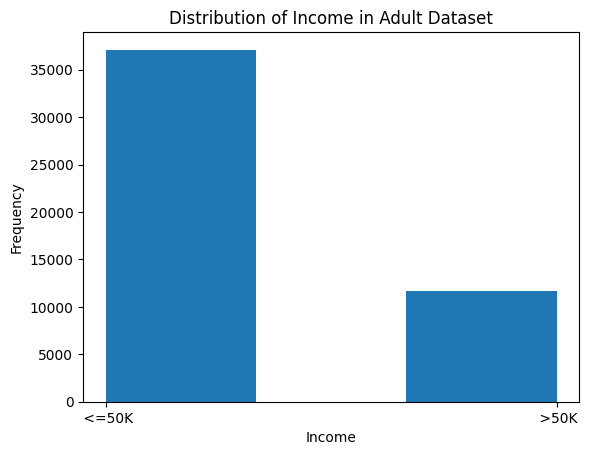

In [15]:
# distribution of income
plt.hist(df["income"], bins=3)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income in Adult Dataset")
plt.show()

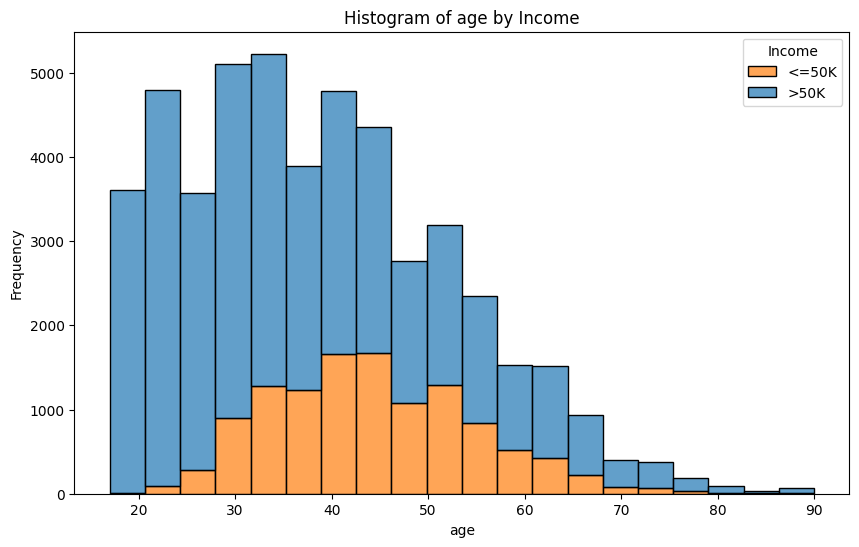

In [16]:
# age/ income
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='age', hue='income', bins=20, alpha=0.7, multiple='stack')
plt.title('Histogram of age by Income')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

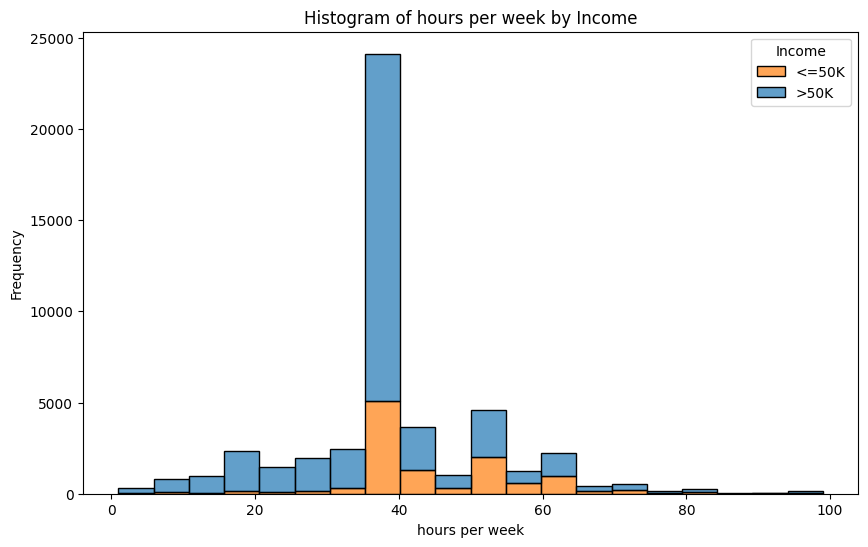

In [17]:
# hours per week/ income
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='hours-per-week', hue='income', bins=20, alpha=0.7, multiple='stack')
plt.title('Histogram of hours per week by Income')
plt.xlabel('hours per week')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

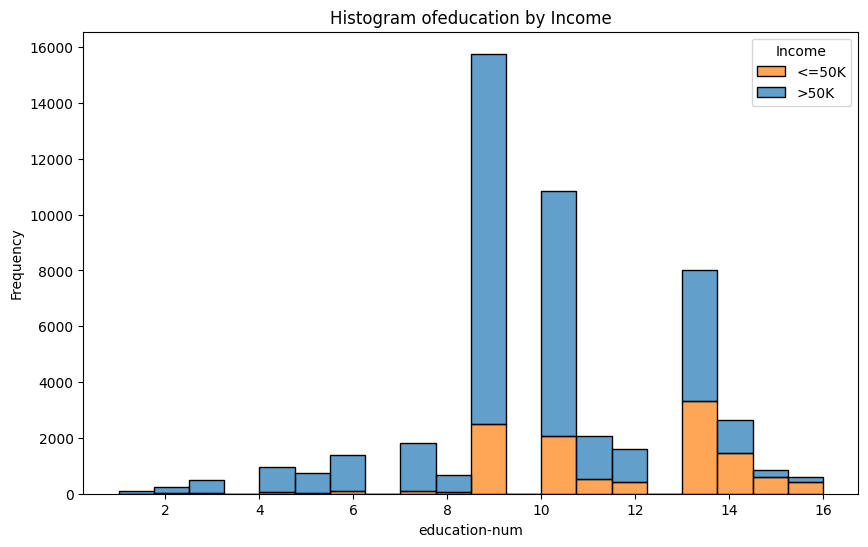

In [18]:
# education num/ income
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='education-num', hue='income', bins=20, alpha=0.7, multiple='stack')
plt.title('Histogram ofeducation by Income')
plt.xlabel('education-num')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

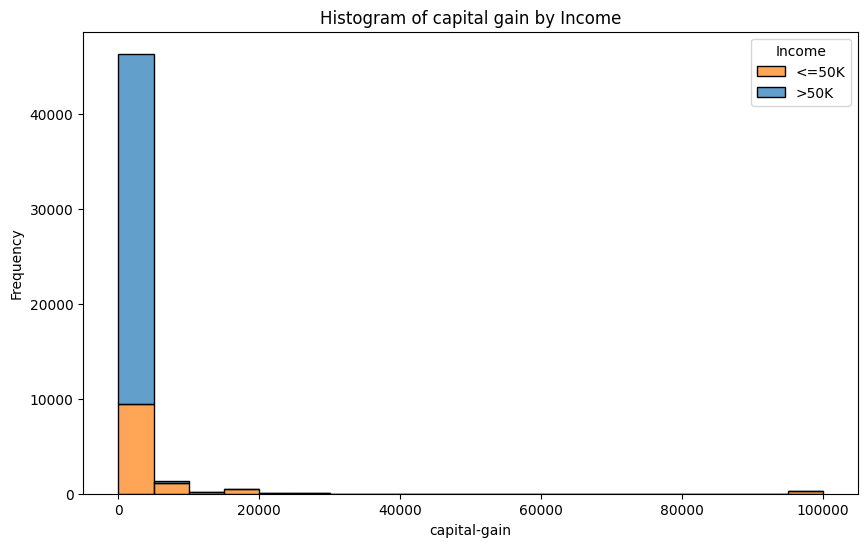

In [19]:
# capital gain/ income
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='capital-gain', hue='income', bins=20, alpha=0.7, multiple='stack')
plt.title('Histogram of capital gain by Income')
plt.xlabel('capital-gain')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

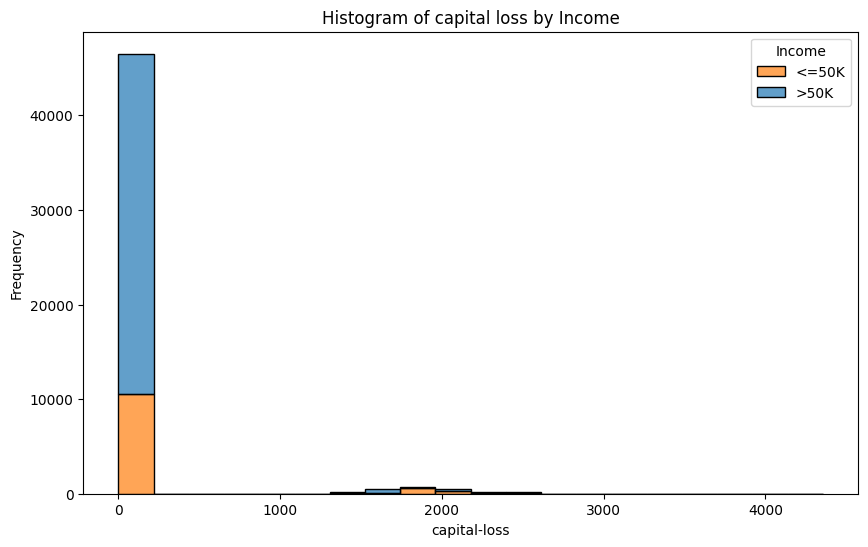

In [20]:
# capital loss/ income
plt.figure(figsize=(10, 6))
sb.histplot(data=df, x='capital-loss', hue='income', bins=20, alpha=0.7, multiple='stack')
plt.title('Histogram of capital loss by Income')
plt.xlabel('capital-loss')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

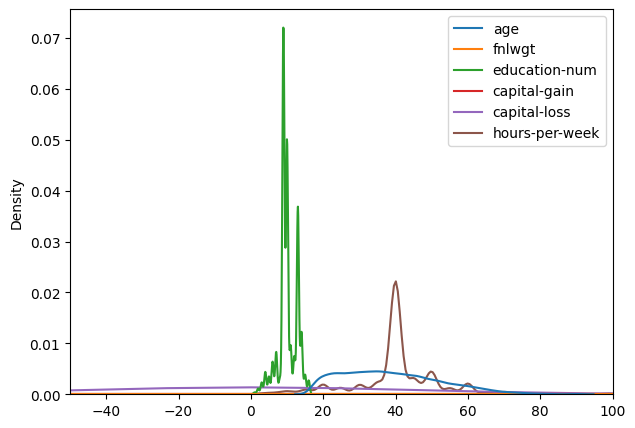

In [21]:
# Density plot
fig, ax = plt.subplots(figsize=(7,5))
sb.kdeplot(data=df, ax=ax)
ax.set_xlim(-50,100)

plt.show()

# Boxplot for numerical features

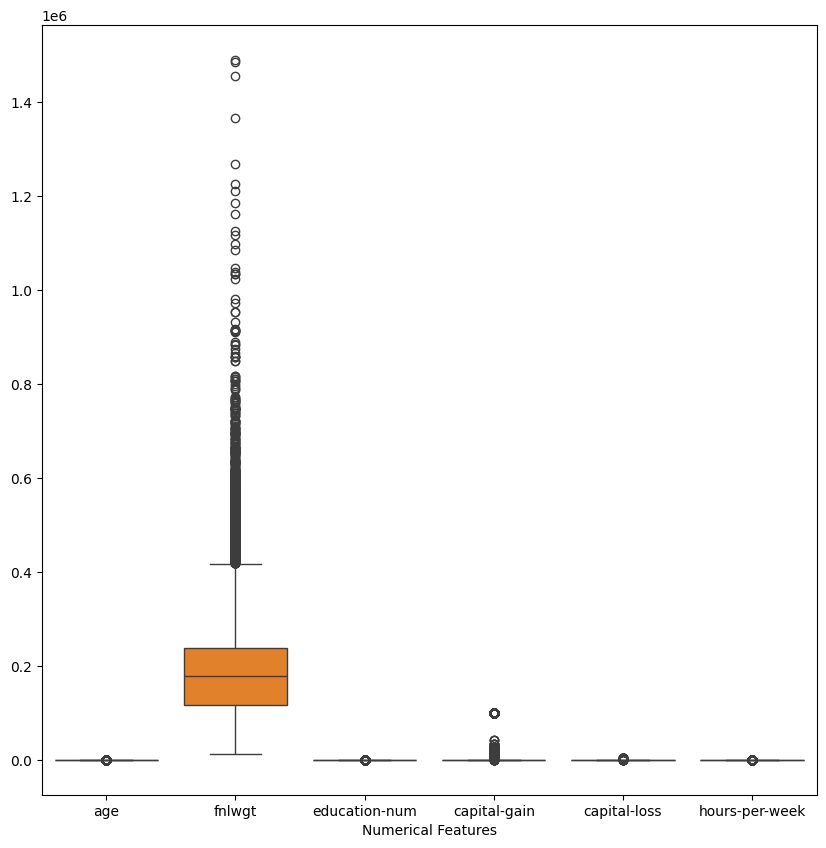

In [22]:
plt.figure(figsize=(10, 10))
sb.boxplot(data=df)
plt.xlabel("Numerical Features")
plt.show()

# Handling outliers

In [23]:
# function to find outliers
def calIqr(feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print(f"Feature: {feature}\nlower bound: {lower_bound}\nupper bound: {upper_bound}")
  return lower_bound, upper_bound

In [24]:
age_lower, age_upper = calIqr("age")
df["age"] = np.clip(df["age"], age_lower, age_upper)

Feature: age
lower bound: -2.0
upper bound: 78.0


In [25]:
hpw_lower, hpw_upper = calIqr("hours-per-week")
df["hours-per-week"] = np.clip(df["hours-per-week"], hpw_lower, hpw_upper)

Feature: hours-per-week
lower bound: 32.5
upper bound: 52.5


In [26]:
calIqr("capital-gain")
df["capital-gain"] = np.clip(df["capital-gain"], hpw_lower, hpw_upper)

Feature: capital-gain
lower bound: 0.0
upper bound: 0.0


In [27]:
calIqr("capital-loss")
df["capital-loss"] = np.clip(df["capital-loss"], hpw_lower, hpw_upper)

Feature: capital-loss
lower bound: 0.0
upper bound: 0.0


# Check for duplications

In [28]:

df.duplicated().values.any()

True

In [29]:
print("Before: ", df.duplicated().sum())

duplicates = df.duplicated()
df = df.loc[~duplicates]

print("After: ", df.duplicated().sum())

display(df)

Before:  17
After:  0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,52.5,32.5,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,32.5,32.5,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,32.5,32.5,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,32.5,32.5,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,32.5,32.5,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,32.5,32.5,36.0,United-States,<=50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,32.5,32.5,40.0,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,32.5,32.5,50.0,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,52.5,32.5,40.0,United-States,<=50K


In [30]:
df.duplicated().values.any()

False

# Scale dataset

In [31]:
# Create a StandardScaler object
scaler = StandardScaler()

# Select numeric features
scaledVals = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))
# Standardize the numeric data
dfScaled = pd.DataFrame(scaledVals, columns=df.select_dtypes(include=['int64', 'float64']).columns)
# Reset index
dfScaled.reset_index(drop=True, inplace=True)
# Combine scaled numeric data with non-numeric features
dfScaled = pd.concat([dfScaled, df.select_dtypes(exclude=['int64', 'float64']).reset_index(drop=True)], axis=1)

display(dfScaled)


# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[numeric_cols])
# df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)
# dfScaled = pd.concat([df_scaled, df.select_dtypes(exclude=['int64', 'float64'])], axis=1)
# dfScaled.reset_index(drop=True, inplace=True)

# display(dfScaled)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.026877,-1.061786,1.136520,3.329862,-0.221546,-0.193614,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.834098,-1.006920,1.136520,-0.300313,-0.221546,-1.406299,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.046507,0.245994,-0.419789,-0.300313,-0.221546,-0.193614,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.054249,0.426592,-1.197943,-0.300313,-0.221546,-0.193614,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.780344,1.408284,1.136520,-0.300313,-0.221546,-0.193614,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48770,0.026877,0.243845,1.136520,-0.300313,-0.221546,-0.840379,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48771,1.861469,1.247275,-0.419789,-0.300313,-0.221546,-0.193614,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,United-States,<=50K
48772,-0.046507,1.754557,1.136520,-0.300313,-0.221546,1.423300,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48773,0.393795,-1.001429,1.136520,3.329862,-0.221546,-0.193614,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


# Check for correlation

<ipython-input-32-0a33934a8f7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


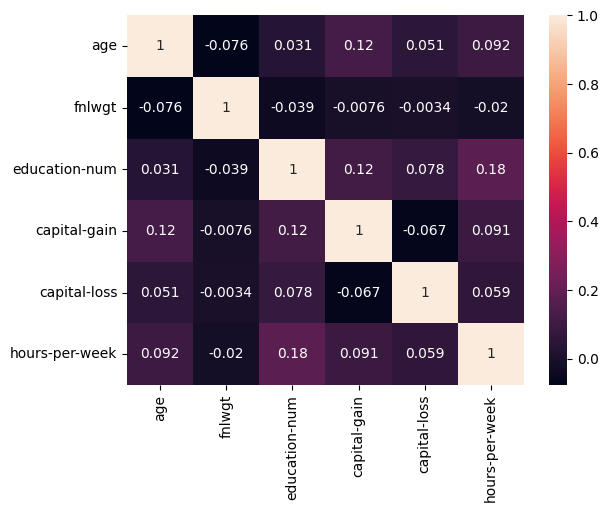

In [32]:
# Calculate correlation matrix
correlation = df.corr()
sb.heatmap(correlation, annot=True)
plt.show()

In [33]:
# correlation threshold
correlation_threshold = 0.7

highly_correlated = set()

# Iterate through correlation matrix
for col in correlation.columns:
    for other_col in correlation.columns:
      # Check for absolute correlation exceeding threshold
        if col != other_col and abs(correlation[col][other_col]) > correlation_threshold:
            highly_correlated.add(tuple(sorted([col, other_col])))

if highly_correlated:
    print("Highly correlated features (absolute correlation > ", correlation_threshold, "):")
    for item in highly_correlated:
        print(item)
else:
    print("No highly correlated features found after oversampling.")

No highly correlated features found after oversampling.


# X,y split

In [34]:
X = dfScaled.drop('income', axis=1)
y = dfScaled['income']

print(f"X: {len(X)} | y: {len(y)}")

X: 48775 | y: 48775


# Train and test the naive bayes classification

In [35]:
# Label encoding
label_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[label_categorical], drop_first=True)
encoded_features = pd.concat([X.drop(label_categorical, axis=1), X_categorical], axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(encoded_features, y, test_size=0.25)

In [36]:
# create naive bayes model and train
# nbModel = GaussianNB()
# nbModel.fit(X_train, y_train)

pipeline_nb = Pipeline([
    ('sampling', SMOTEENN()),  # Over- and undersampling
    ('classifier', GaussianNB())  # Classifier
])

pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTEENN()), ('classifier', GaussianNB())])

              precision    recall  f1-score   support

       <=50K       0.94      0.49      0.65      9273
        >50K       0.36      0.90      0.51      2921

    accuracy                           0.59     12194
   macro avg       0.65      0.69      0.58     12194
weighted avg       0.80      0.59      0.61     12194



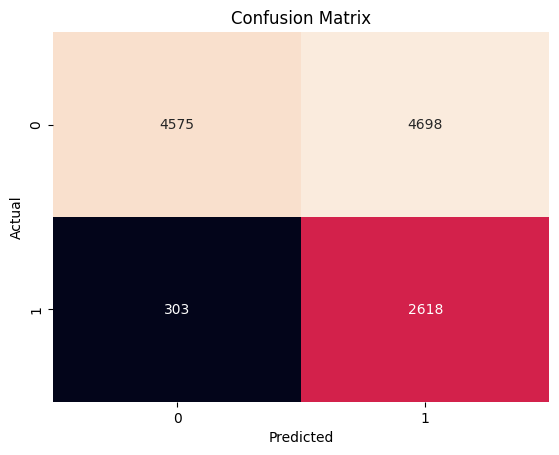

In [37]:
# test data predict
y_pred_nb = pipeline_nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))

conf_matrix = confusion_matrix(y_test, y_pred_nb)
sb.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

       <=50K       0.93      0.49      0.65     27821
        >50K       0.36      0.89      0.51      8760

    accuracy                           0.59     36581
   macro avg       0.65      0.69      0.58     36581
weighted avg       0.80      0.59      0.61     36581



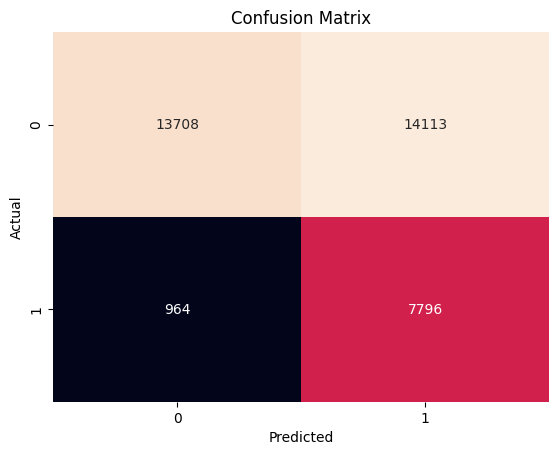

In [38]:
# training data predict
y_pred_nb = pipeline_nb.predict(X_train)
print(classification_report(y_train,y_pred_nb))

conf_matrix = confusion_matrix(y_train, y_pred_nb)
sb.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest classification model

In [39]:
# Label encoding
label_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_categorical = pd.get_dummies(X[label_categorical], drop_first=True)
encoded_features = pd.concat([X.drop(label_categorical, axis=1), X_categorical], axis=1)

# test train split
X_train, X_test, y_train, y_test = train_test_split(encoded_features, y, test_size=0.2, random_state=42)

# random forest classifier
pipeline_rf = Pipeline([
    ('sampling', SMOTEENN(random_state=42)),  # Over- and undersampling
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))  # Classifier
])

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTEENN(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      7415
        >50K       0.55      0.83      0.66      2340

    accuracy                           0.80      9755
   macro avg       0.74      0.81      0.76      9755
weighted avg       0.84      0.80      0.81      9755



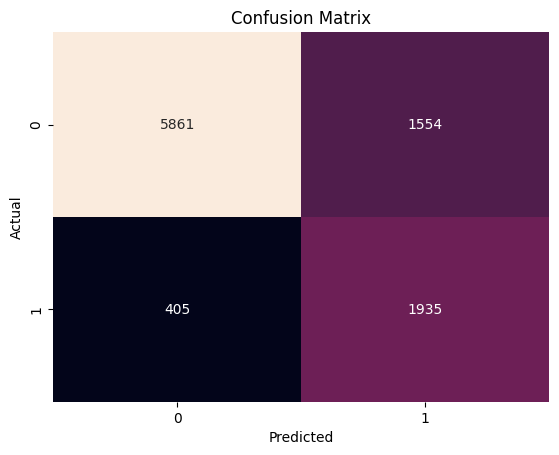

In [40]:
# test data
y_pred_rf = pipeline_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
sb.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

              precision    recall  f1-score   support

       <=50K       0.97      0.82      0.89     29679
        >50K       0.61      0.92      0.74      9341

    accuracy                           0.84     39020
   macro avg       0.79      0.87      0.81     39020
weighted avg       0.88      0.84      0.85     39020



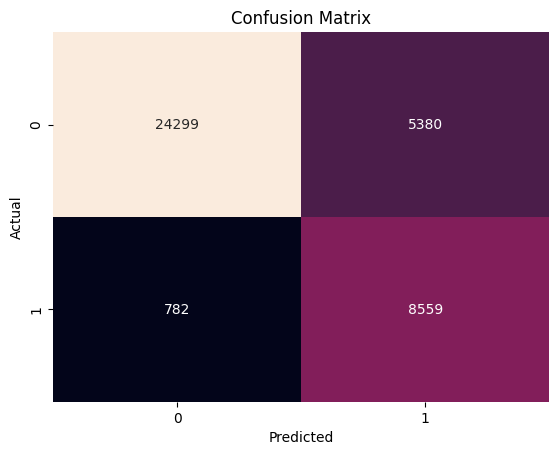

In [41]:
# train data
y_pred_rf = pipeline_rf.predict(X_train)
print(classification_report(y_train,y_pred_rf))

conf_matrix = confusion_matrix(y_train, y_pred_rf)
sb.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()